길이가 25cm이고 무게가 150g인 생선은 도미인데 지난 학습에서 생성한 모델은 이를 빙어라고 예측한다.

### 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

이전에는 파이썬 리스트를 순회하면서 원소를 하나씩 꺼내 생선 하나의 길이와 무게를 리스트 안의 리스트로 직접 구성하였다. 하지만 넘파이를 활용하면 훨씬 간편하게 만들 수 있다.

In [2]:
import numpy as np

In [4]:
np.column_stack(([1,2,3],[4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

넘파이의 column_stack() 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결.  
이때 연결할 리스트는 파이썬 튜플<sup>tuple</sup>로 전달한다.

#### 튜플?  
파이썬 튜플은 리스트와 비슷하다. 리스트처럼 원소에 순서가 있지만 한 번 만들어진 튜플은 수정할 수 없다. 튜플을 사용하면 함수로 전달한 값이 바뀌지 않는다는 것을 믿을 수 있기 때문에 매개변수 값으로 주로 사용한다.

In [6]:
fish_data = np.column_stack((fish_length, fish_weight))

fish_length와 fish_weight를 합치기

In [7]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


처음 5개 데이터를 확인하여 잘 연결되었는지 확인

In [8]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


np.ones()는 원하는 개수의 1을 채운 배열을 생성. np.zeros()는 0을 생성

#### 배열을 연결하는 np.column_stack()과 np.concatenate() 함수

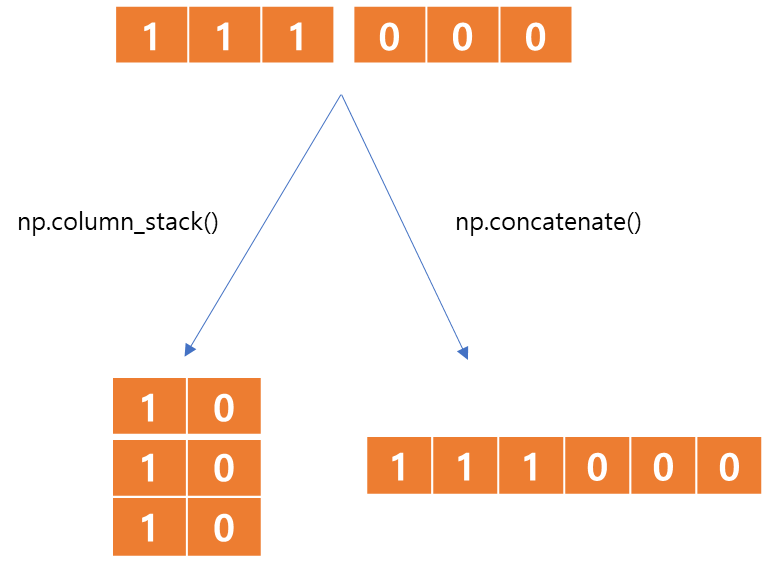

np.concatenate() 함수를 사용해 타깃 데이터를 만들어 보자. np.column_stack()과 마찬가지로 연결한 리스트나 배열을 튜플로 전달해야 한다.

In [9]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [10]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


### 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [11]:
from sklearn.model_selection import train_test_split

train_test_split() 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 나누어 주고 나누기 전에 섞어준다. random_state 매개변수를 이용하여 랜덤 시드를 지정해줄 수 있다.  
기본적으로 25%를 테스트 세트로 떼어낸다.

In [14]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state = 42)

In [15]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


넘파이 배열의 shape 속성으로 입력 데이터의 크기를 출력

In [17]:
print(train_target.shape, test_target.shape)

(36,) (13,)


훈련 데이터와 테스트 데이터가 36개와 13개로 나뉘었고 입력 데이터는 2개의 열이 있는 2차원 배열이고 타겟 데이터는 1차원 배열이다.

넘파이 배열의 크기는 파이썬의 튜플로 표현된다. 튜플의 원소가 하나면 원소 뒤에 콤마를 추가한다. 이 예시에서 타겟 데이터는 1차원 배열이므로 원소가 하나인 튜플로 표현되었다.

In [18]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


도미와 빙어가 잘 섞였는지 확인

13개의 테스트 세트중에 10개가 도미이고 3개가 빙어이다. 원래 도미와 빙어의 개수가 35개와 14개이므로 두 생선의 비율은 2.5:1 이지만 테스트 세트의 도미와 빙어의 비율은 3.3:1로 샘플링 편향이 있다.  
이처럼 무작위로 데이터를 나누었을 때 샘플이 골고루 섞이지 않을 수 있다. 특히 일부 클래스의 개수가 적을 때 이런 일이 생길 수 있다. train_test_split()함수의 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눈다. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용하다.

In [19]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [20]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


테스트 세트의 비율이 2.25:1이 되었다.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

k-최근접 이웃 훈련 후 모델 평가

In [22]:
print(kn.predict([[25,150]]))

[0.]


빙어로 판정된 수상한 도미 한 마리..

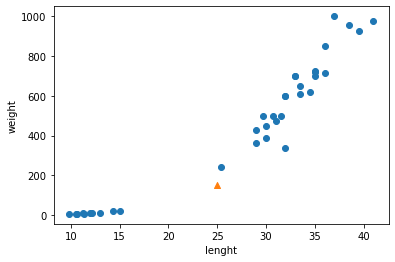

In [23]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker = '^')  # marker 매개변수는 모양을 지정
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

샘플을 다른 데이터와 함께 산점도로 표현

※ k-최근접 이웃은 주변의 샘플 중에서 다수인 클래스를 예측으로 사용한다. 일단은 이 샘플의 주변 샘플을 알아보자. KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드를 제공하며 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환한다. KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값은 5이므로 5개의 이웃이 반환된다.

In [25]:
distances, indexes = kn.kneighbors([[25,150]])

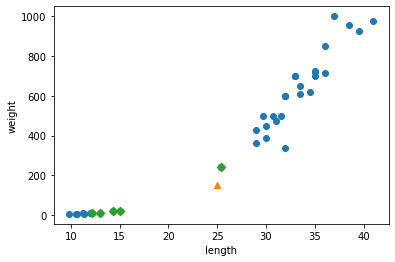

In [27]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보기.

In [28]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [29]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


직접 데이터를 확인해보면 위의 그래프 처럼 1개만 도미이고 나머지 4개는 빙어

#### 산점도를 보면 직관적으로 도미들이 가깝게 보이는데 왜 가장 가까운 이웃을 빙어라고 판단했을까?  
kneighbors() 메서드 에서 반환한 distances 배열을 출력해보자.

In [30]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


## 기준을 맞춰라  
distances 값이 그래프 상의 겉보기 거리와 다른 이유는 x축과 y축의 값 자체가 달라(무게, 길이) 발생하는 문제이다.  
이를 두 특성의 스케일이 다른 상황이라고 하며 특성값을 일정한 기준으로 맞춰줘야 k-최근접 이웃과 같은 거리 기반 알고리즘을 제대로 사용할 수 있다.

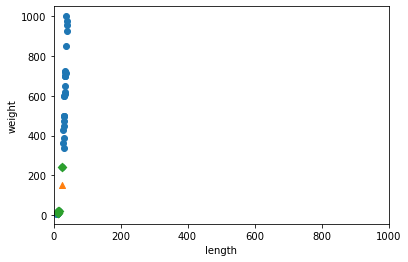

In [32]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker = '^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker = 'D')
plt.xlim((0,1000)) # x축의 범위를 y축과 동일하게 0~1000으로 변경
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

x축의 범위를 y축과 같은 0~1000으로 변경하니 산점도가 거의 일직선으로 나타나며 생선의 길이(x축)은 생선의 무게(y축)에 비해 거리 값에 크게 영향을 미치지 못했음을 확인 가능

### 가장 널리 사용하는 전처리 방법 중 하나는 표준점수(z 점수)이다.  
표준점수는 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타낸다.
이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할 수 있다.

#### 표준점수와 표준편차  
분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다.  
표준편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다. 
표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.

표준점수를 구하는 방법 : 평균을 빼고 표준편차를 나누어준다.

In [34]:
mean = np.mean(train_input, axis = 0)
std = np.std(train_input, axis = 0)

np.mean() 함수는 평균을 계산하고 np.std() 함수는 표준편차를 계산한다. 특성마다 값의 스케일 값이 다르므로 평균과 표준편차는 각 특성별로 계산해야한다. 이를 위해 axis = 0으로 지정했다.  
이렇게 하면 행을 따라 각 열의 통계값을 계산한다.

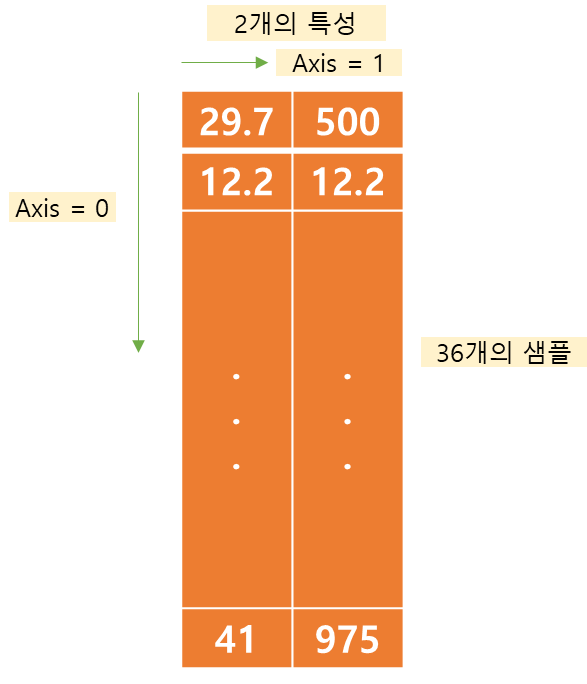

In [35]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


계산된 평균과 표준편차

In [37]:
train_scaled = (train_input - mean) / std

원본데이터에서 평균을 빼고 표준편차로 나눠어 표준점수로 변환.  
이 식은 넘파이를 통해 train_input의 모든 행에서 mean에 있는 두 평균값을 뺴준다. 그 다음 std에 있는 두 표준편차를 다시 모든 행에 나누기로 적용한다. 이러한 넘파이 기능을 브로드캐스팅 이라고 부른다.  
브로드캐스팅은 넘파이 배열 사이에서 일어난다.

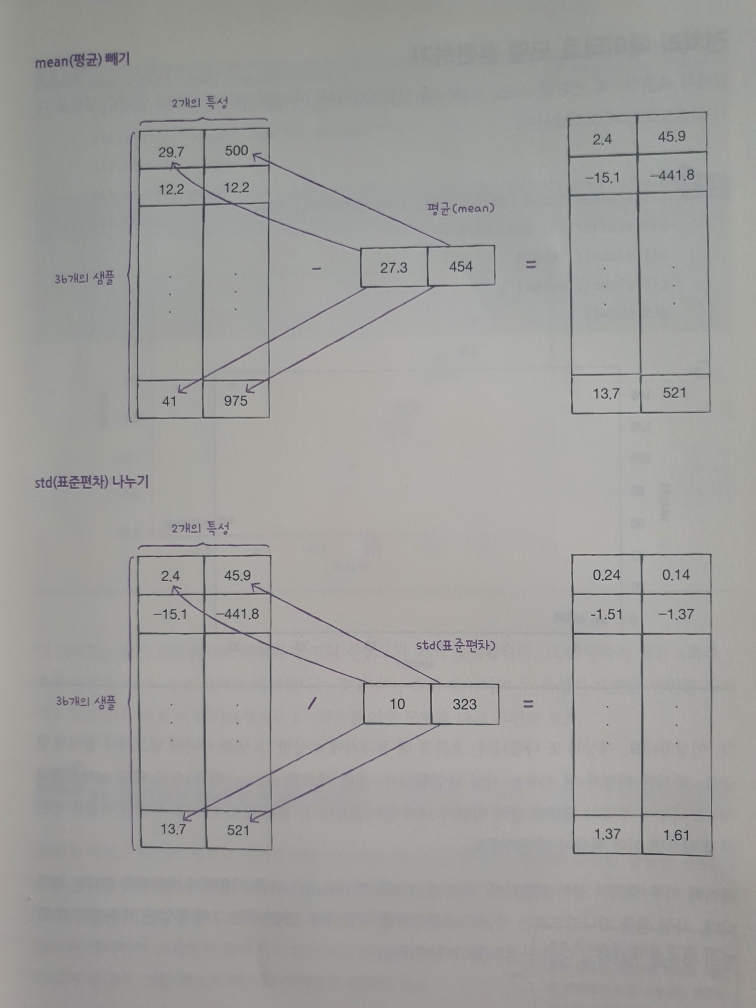

### train_scaled를 다시 산점도로 그려보기

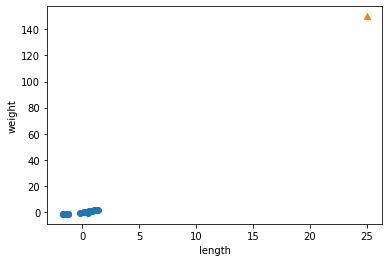

In [38]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

그래프가 이상하다. 왜냐? 샘플 25,150도 동일하게 표준점수화 하지 않았기 때문. 표준점수화 해서 다시 그려보자.

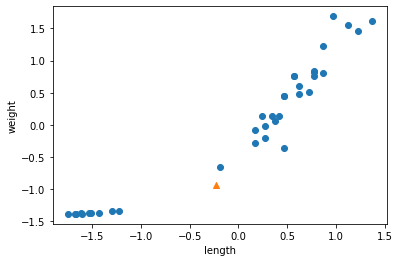

In [39]:
new = ([25,150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

앞서 표준편차로 변환하기 전의 산점도와 거의 동일한 그래프가 그려졌고 크게 달라진점은 x축과 y축의 범위가 -1.5 ~ 1.5 사이로 바뀌었다는 것이다. k-최근접 이웃 모델을 다시 훈련해보자.

In [40]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

훈련을 마치고 테스트 세트로 평가할 때는 주의해야 할 점이 있다. 수상한 샘플을 훈련 세트의 평균과 표준편차로 변환해야 같은 비율의 산점도를 그릴 수 있었던 것 처럼 테스트 세트도 마찬가지로 훈련 세트의 평균과 표준편차로 변환해야 한다. 그렇지않으면 데이터의 스케일이 같아지지 않는다.

In [42]:
test_scaled = (test_input - mean) / std

In [43]:
kn.score(test_scaled, test_target)

1.0

모델 평가 결과는 모두 맞음으로 도출

In [44]:
print(kn.predict([new]))

[1.]


드디어 도미로 인식하였다.
마지막으로 kneighbors() 함수로 이 샘플의 k-최근접 이웃을 구한 다음 산점도로 그려보자.

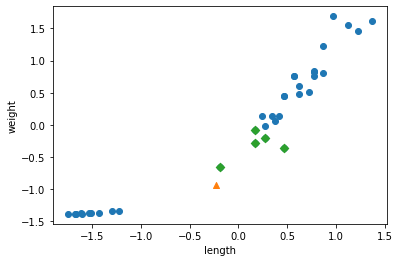

In [45]:
distances, indexes = kn.kneighbors([new]) # new로 부터 가장 가까운 샘플들(5개)의 거리와 인덱스를 구하기
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker = '^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


특성값의 스케일에 민감하지 않고 안정적인 예측을 할 수 있는 모델을 만들었다.

데이터 전처리 : 머신러닝 모델에 훈련 데이터를 주입하기 전에 가공하는 단계  
표준점수 : 훈련 세트의 스케일을 바꾸는 대표적인 방법 중 하나. 표준점수를 얻으려면 특성의 평균을 빼고 표준편차로 나눈다. 반드시 훈련 세트의 평균과 표준편차로 테스트 세트를 바꾸어야 한다.  
브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

### scikit-learn
train_test_split()은 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수이다. 여러 개의 배열을 전달할 수 있고 테스트 세트로 나눌 비율은 test_size 매개변수에서 지정할 수 있으며 기본값은 0.25(25%)이다.  
shuffle 매개변수로 훈련 세트와 테스트 세트로 나누기 전에 무작위로 섞을지 여부를 결정. 기본값은 true이며 stratify 매개변수에 클래스 레이블이 담긴 배열(일반적으로 타깃 데이터)을 전달하면 클래스 비율에 맞게 훈련 세트와 테스트 세트를 나눈다.

kneighbors()는 k-최근접 이웃 객체의 메서드이다. 이 메서드는 입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스를 반환한다. 기본적으로 이웃의 개수는 KNeighborsClassifier 클래스의 객체를 생성할 때 지정한 개수를 사용한다. 하지만 n_neighbors 매개변수에서 다르게 지정할 수도 있다.  
return_distance 매개변수를 False로 지정하면 이웃 샘플의 인덱스만 반환하고 거리는 반환하지 않는다. 기본값은 True이다.